[Go to "10 minutes to `pandas`"](https://pandas.pydata.org/docs/getting_started/10min.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Creation

## 1.1 Series

> Creating a `Series` from a list of values. `pandas` by default adds an integer index:

In [2]:
s = pd.Series([2, 4, 8, np.nan, 128], dtype='float32') # creating the series
s

0      2.0
1      4.0
2      8.0
3      NaN
4    128.0
dtype: float32

## 1.2 Dataframes

> Creating a `DataFrame` with a `datetime` index column labels, from a `NumPy` array:

In [3]:
# creating a datetime index
dates = pd.date_range('2020-01-01', periods=7)

# creating the NumPy array
data_array = np.random.randn(7, 4)

# creating the DataFrame
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,1.631797,1.545634,-0.198643,0.674131
2020-01-02,0.896483,-0.087669,0.344452,0.460212
2020-01-03,1.042784,-0.081727,-1.257618,-0.935303
2020-01-04,-1.321391,0.148689,0.612121,1.214824
2020-01-05,1.230934,-0.740843,-1.302087,0.223776
2020-01-06,0.217837,0.294705,-1.839068,-0.644434
2020-01-07,-0.171886,0.903747,-0.959843,-1.768318


In [4]:
# a one-liner for the above
df = pd.DataFrame(np.random.randn(7, 4),
                   index=pd.date_range('2020-01-01', periods=7),
                   columns=list('ABCD')) 
df

,A,B,C,D
2020-01-01,0.453417,-0.173189,1.288629,1.004904
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-05,0.149223,1.406567,1.154210,-0.132701
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-07,0.357833,0.509404,-0.990356,0.466180


> Creating a `DataFrame` from a `dict` of objects that can be converted to series-like:

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('2020-01-02'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2020-01-02,1.0,3,test,foo
1,1.0,2020-01-02,1.0,3,train,foo
2,1.0,2020-01-02,1.0,3,test,foo
3,1.0,2020-01-02,1.0,3,train,foo


In [6]:
df2.dtypes  # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data

### 2.1 Viewing the top of the dataframe

In [7]:
df.head()

,A,B,C,D
2020-01-01,0.453417,-0.173189,1.288629,1.004904
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-05,0.149223,1.406567,1.154210,-0.132701


### 2.2 Viewing the bottom of the dataframe

In [8]:
df.tail()

,A,B,C,D
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-05,0.149223,1.406567,1.154210,-0.132701
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-07,0.357833,0.509404,-0.990356,0.466180


### 2.3 Viewing the index and columns

In [9]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### 2.4 To get a quick statistical summary

In [11]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.369983,0.659907,0.543607,0.338840
std,0.601211,0.490543,1.015351,0.670983
min,-0.520379,-0.173189,-0.990356,-0.855995
25%,0.033149,0.532886,-0.180990,0.021564
50%,0.357833,0.588550,1.001278,0.466180
75%,0.774459,0.865824,1.221419,0.856830
max,1.137209,1.406567,1.713467,1.004904


In [12]:
# for non-numeric columns
df2.describe(include=['object', 'category']) 

,E,F
count,4,4
unique,2,1
top,train,foo
freq,2,4


### 2.5 Transposing data

In [13]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07
A,0.453417,-0.520379,1.137209,1.095501,0.149223,-0.082925,0.357833
B,-0.173189,0.680110,0.588550,0.556369,1.406567,1.051537,0.509404
C,1.288629,-0.552864,1.713467,1.001278,1.154210,0.190884,-0.990356
D,1.004904,0.975723,0.175829,0.737938,-0.132701,-0.855995,0.466180


### 2.6 Sorting by axis

In [14]:
# sorting the columns (by label) in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,1.004904,1.288629,-0.173189,0.453417
2020-01-02,0.975723,-0.552864,0.680110,-0.520379
2020-01-03,0.175829,1.713467,0.588550,1.137209
2020-01-04,0.737938,1.001278,0.556369,1.095501
2020-01-05,-0.132701,1.154210,1.406567,0.149223
2020-01-06,-0.855995,0.190884,1.051537,-0.082925
2020-01-07,0.466180,-0.990356,0.509404,0.357833


In [15]:
# sorting the rows (by index) in descending order
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2020-01-07,0.357833,0.509404,-0.990356,0.466180
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-05,0.149223,1.406567,1.154210,-0.132701
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-01,0.453417,-0.173189,1.288629,1.004904


### 2.7 Sorting by values

In [16]:
# sorting rows in ascending order by values in colums B
df.sort_values(by='B')  # the default order is ascending=True

,A,B,C,D
2020-01-01,0.453417,-0.173189,1.288629,1.004904
2020-01-07,0.357833,0.509404,-0.990356,0.466180
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-05,0.149223,1.406567,1.154210,-0.132701


In [17]:
# sorting rows in descending order by values in colums C
df.sort_values(by='C', ascending=False)

,A,B,C,D
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-01,0.453417,-0.173189,1.288629,1.004904
2020-01-05,0.149223,1.406567,1.154210,-0.132701
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-07,0.357833,0.509404,-0.990356,0.466180


# 3. Selection

### 3.1 Selecting a single column, which yields a `Series`

In [18]:
df.A

2020-01-01    0.453417
2020-01-02   -0.520379
2020-01-03    1.137209
2020-01-04    1.095501
2020-01-05    0.149223
2020-01-06   -0.082925
2020-01-07    0.357833
Freq: D, Name: A, dtype: float64

In [19]:
df['A']

2020-01-01    0.453417
2020-01-02   -0.520379
2020-01-03    1.137209
2020-01-04    1.095501
2020-01-05    0.149223
2020-01-06   -0.082925
2020-01-07    0.357833
Freq: D, Name: A, dtype: float64

### 3.2 Selecting slices of rows

In [20]:
df['2020-01-02':'2020-01-04']

,A,B,C,D
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-04,1.095501,0.556369,1.001278,0.737938


### 3.3 Selection by label

In [21]:
# selecting the first row
df.loc['2020-01-01']

A    0.453417
B   -0.173189
C    1.288629
D    1.004904
Name: 2020-01-01 00:00:00, dtype: float64

In [22]:
# selecting values from columns 'A' and 'C'
df.loc[:, ['A', 'C']]

,A,C
2020-01-01,0.453417,1.288629
2020-01-02,-0.520379,-0.552864
2020-01-03,1.137209,1.713467
2020-01-04,1.095501,1.001278
2020-01-05,0.149223,1.154210
2020-01-06,-0.082925,0.190884
2020-01-07,0.357833,-0.990356


In [23]:
# multi-axis label selection
df.loc['2020-01-02':'2020-01-05', ['B', 'D']]

,B,D
2020-01-02,0.680110,0.975723
2020-01-03,0.588550,0.175829
2020-01-04,0.556369,0.737938
2020-01-05,1.406567,-0.132701


### 3.4 Reduction in dimension of the returned object

In [24]:
df.loc['2020-01-02', ['A', 'B']]

A   -0.520379
B    0.680110
Name: 2020-01-02 00:00:00, dtype: float64

### 3.5 Getting fast access to a scalar value

In [25]:
 df.at['2020-01-04', 'A'] # label based

1.0955014279492619

In [26]:
df.iat[3, 0] # position based

1.0955014279492619

### 3.6 Selection by position

In [27]:
df.iloc[4]

A    0.149223
B    1.406567
C    1.154210
D   -0.132701
Name: 2020-01-05 00:00:00, dtype: float64

In [28]:
df.iloc[3:5, 2:4]

,C,D
2020-01-04,1.001278,0.737938
2020-01-05,1.154210,-0.132701


In [29]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-01-02,-0.520379,-0.552864
2020-01-03,1.137209,1.713467
2020-01-05,0.149223,1.154210


### 3.7 Boolean indexing

In [30]:
# selecting rows for which values in column 'B' are greater than zero
df[df['B'] > 0]

,A,B,C,D
2020-01-02,-0.520379,0.680110,-0.552864,0.975723
2020-01-03,1.137209,0.588550,1.713467,0.175829
2020-01-04,1.095501,0.556369,1.001278,0.737938
2020-01-05,0.149223,1.406567,1.154210,-0.132701
2020-01-06,-0.082925,1.051537,0.190884,-0.855995
2020-01-07,0.357833,0.509404,-0.990356,0.466180


### 3.8 Using the `isin()` method for filtering

In [31]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2020-01-01,0.453417,-0.173189,1.288629,1.004904,one
2020-01-02,-0.520379,0.680110,-0.552864,0.975723,one
2020-01-03,1.137209,0.588550,1.713467,0.175829,two
2020-01-04,1.095501,0.556369,1.001278,0.737938,three
2020-01-05,0.149223,1.406567,1.154210,-0.132701,four
2020-01-06,-0.082925,1.051537,0.190884,-0.855995,three
2020-01-07,0.357833,0.509404,-0.990356,0.466180,seven


In [32]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2020-01-03,1.137209,0.588550,1.713467,0.175829,two
2020-01-05,0.149223,1.406567,1.154210,-0.132701,four


# 4. Setting

In [33]:
s1 = pd.Series(range(1, 8), index=pd.date_range('2020-01-02', periods=7))

# setting s1 as column 'F' in the dataframe
df['F'] = s1
df

,A,B,C,D,F
2020-01-01,0.453417,-0.173189,1.288629,1.004904,NaN
2020-01-02,-0.520379,0.680110,-0.552864,0.975723,1.0
2020-01-03,1.137209,0.588550,1.713467,0.175829,2.0
2020-01-04,1.095501,0.556369,1.001278,0.737938,3.0
2020-01-05,0.149223,1.406567,1.154210,-0.132701,4.0
2020-01-06,-0.082925,1.051537,0.190884,-0.855995,5.0
2020-01-07,0.357833,0.509404,-0.990356,0.466180,6.0


### 4.1 Setting values by label

In [34]:
df.at['2020-01-03', 'C'] = 0
df

,A,B,C,D,F
2020-01-01,0.453417,-0.173189,1.288629,1.004904,NaN
2020-01-02,-0.520379,0.680110,-0.552864,0.975723,1.0
2020-01-03,1.137209,0.588550,0.000000,0.175829,2.0
2020-01-04,1.095501,0.556369,1.001278,0.737938,3.0
2020-01-05,0.149223,1.406567,1.154210,-0.132701,4.0
2020-01-06,-0.082925,1.051537,0.190884,-0.855995,5.0
2020-01-07,0.357833,0.509404,-0.990356,0.466180,6.0


### 4.2 Setting values by position

In [35]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-01-01,0.453417,0.000000,1.288629,1.004904,NaN
2020-01-02,-0.520379,0.680110,-0.552864,0.975723,1.0
2020-01-03,1.137209,0.588550,0.000000,0.175829,2.0
2020-01-04,1.095501,0.556369,1.001278,0.737938,3.0
2020-01-05,0.149223,1.406567,1.154210,-0.132701,4.0
2020-01-06,-0.082925,1.051537,0.190884,-0.855995,5.0
2020-01-07,0.357833,0.509404,-0.990356,0.466180,6.0


### 4.3 Setting by assigning with a NumPy array

In [36]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2020-01-01,0.453417,0.000000,1.288629,7,NaN
2020-01-02,-0.520379,0.680110,-0.552864,7,1.0
2020-01-03,1.137209,0.588550,0.000000,7,2.0
2020-01-04,1.095501,0.556369,1.001278,7,3.0
2020-01-05,0.149223,1.406567,1.154210,7,4.0
2020-01-06,-0.082925,1.051537,0.190884,7,5.0
2020-01-07,0.357833,0.509404,-0.990356,7,6.0


### 4.4 A `where` operation with setting

In [37]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2020-01-01,0.453417,0.000000,1.28863,7,NaN
2020-01-02,-ve,0.680110,-ve,7,1.0
2020-01-03,1.13721,0.588550,0,7,2.0
2020-01-04,1.0955,0.556369,1.00128,7,3.0
2020-01-05,0.149223,1.406567,1.15421,7,4.0
2020-01-06,-ve,1.051537,0.190884,7,5.0
2020-01-07,0.357833,0.509404,-ve,7,6.0


# 5. Missing Data

In [38]:
# Adding some NaN values (the default representation for missing data)
df.iloc[4, 2:4] = np.nan
df.at['2020-01-05','A'] = np.nan
df

,A,B,C,D,F
2020-01-01,0.453417,0.000000,1.288629,7.0,NaN
2020-01-02,-0.520379,0.680110,-0.552864,7.0,1.0
2020-01-03,1.137209,0.588550,0.000000,7.0,2.0
2020-01-04,1.095501,0.556369,1.001278,7.0,3.0
2020-01-05,NaN,1.406567,NaN,NaN,4.0
2020-01-06,-0.082925,1.051537,0.190884,7.0,5.0
2020-01-07,0.357833,0.509404,-0.990356,7.0,6.0


### 5.1 Dropping rows with missing data

In [39]:
df.dropna()  # returns a copy with rows having NaN values eliminated
# df.dropna(inplace=True)   # modifies df

,A,B,C,D,F
2020-01-02,-0.520379,0.680110,-0.552864,7.0,1.0
2020-01-03,1.137209,0.588550,0.000000,7.0,2.0
2020-01-04,1.095501,0.556369,1.001278,7.0,3.0
2020-01-06,-0.082925,1.051537,0.190884,7.0,5.0
2020-01-07,0.357833,0.509404,-0.990356,7.0,6.0


### 5.2 Filling missing values

In [40]:
df.fillna(value=0.11111) # returns a copy with NaN values substituted with 0.11111

,A,B,C,D,F
2020-01-01,0.453417,0.000000,1.288629,7.00000,0.11111
2020-01-02,-0.520379,0.680110,-0.552864,7.00000,1.00000
2020-01-03,1.137209,0.588550,0.000000,7.00000,2.00000
2020-01-04,1.095501,0.556369,1.001278,7.00000,3.00000
2020-01-05,0.111110,1.406567,0.111110,0.11111,4.00000
2020-01-06,-0.082925,1.051537,0.190884,7.00000,5.00000
2020-01-07,0.357833,0.509404,-0.990356,7.00000,6.00000


### 5.3 To get the boolean mask where values are `nan`:

In [41]:
pd.isna(df)

,A,B,C,D,F
2020-01-01,False,False,False,False,True
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-04,False,False,False,False,False
2020-01-05,True,False,True,True,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False


# 6. Operations

In [42]:
df.mean() # gives the mean for each column

A    0.406776
B    0.684648
C    0.156262
D    7.000000
F    3.500000
dtype: float64

In [43]:
df.mean(axis=1) # calculates the mean for each row 

2020-01-01    2.185511
2020-01-02    1.521373
2020-01-03    2.145152
2020-01-04    2.530630
2020-01-05    2.703284
2020-01-06    2.631899
2020-01-07    2.575376
Freq: D, dtype: float64

### 6.1 Applying functions to the dataframe

In [44]:
df.fillna(0).apply(np.ptp)  # quickly getting the range per column

A    1.657588
B    1.406567
C    2.278984
D    7.000000
F    6.000000
dtype: float64

In [45]:
df.apply(lambda x: x**3 + 1 )

,A,B,C,D,F
2020-01-01,1.093217,1.000000,3.139851,344.0,NaN
2020-01-02,0.859084,1.314585,0.831013,344.0,2.0
2020-01-03,2.470687,1.203868,1.000000,344.0,9.0
2020-01-04,2.314737,1.172222,2.003840,344.0,28.0
2020-01-05,NaN,3.782797,NaN,NaN,65.0
2020-01-06,0.999430,2.162716,1.006955,344.0,126.0
2020-01-07,1.045818,1.132187,0.028655,344.0,217.0


### 6.2 Histogramming

In [46]:
s = pd.Series(list('abcdababddknkz'))
s.value_counts()

d    3
a    3
b    3
k    2
n    1
z    1
c    1
dtype: int64

### 6.3 String methods

In [47]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [48]:
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

# 7. Merge

### 7.1 Concat

In [49]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,0.097635,-0.003692,-0.363483,0.478808
1,0.316404,0.646055,-0.112017,-1.720160
2,0.300306,-0.711412,-1.282435,-0.735237
3,1.282291,0.128093,2.004826,-1.082894
4,1.498849,0.539724,-1.844393,0.447462
5,-0.697291,-0.647681,0.736670,0.721550
6,-1.178286,-1.056352,-1.539328,-0.316530
7,1.038485,-0.389548,0.244140,-1.347726


In [50]:
# getting 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0  0.097635 -0.003692 -0.363483  0.478808
1  0.316404  0.646055 -0.112017 -1.720160
2  0.300306 -0.711412 -1.282435 -0.735237

        1st       2nd       3rd       4th
3  1.282291  0.128093  2.004826 -1.082894
4  1.498849  0.539724 -1.844393  0.447462
5 -0.697291 -0.647681  0.736670  0.721550
6 -1.178286 -1.056352 -1.539328 -0.316530

        1st       2nd      3rd       4th
7  1.038485 -0.389548  0.24414 -1.347726


In [51]:
# concatinating the 3 chunks 
df4 = pd.concat([df3, df2, df1])
df4

,1st,2nd,3rd,4th
7,1.038485,-0.389548,0.244140,-1.347726
3,1.282291,0.128093,2.004826,-1.082894
4,1.498849,0.539724,-1.844393,0.447462
5,-0.697291,-0.647681,0.736670,0.721550
6,-1.178286,-1.056352,-1.539328,-0.316530
0,0.097635,-0.003692,-0.363483,0.478808
1,0.316404,0.646055,-0.112017,-1.720160
2,0.300306,-0.711412,-1.282435,-0.735237


### 7.2 Join
SQL - style merges

In [52]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [53]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [54]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 8. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [55]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two'],
                   'C': np.random.randn(6),
                   'D': np.random.randn(6)})
df

,A,B,C,D
0,foo,one,-0.127531,0.476764
1,bar,one,0.803650,0.601037
2,foo,two,-1.339360,-0.772282
3,bar,three,0.307368,0.272438
4,foo,two,2.550257,-0.744247
5,bar,two,0.444994,-0.638823


In [56]:
 df.groupby('B').sum()

,C,D
B,,
one,0.676119,1.077800
three,0.307368,0.272438
two,1.655891,-2.155352


In [57]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.803650  0.601037
    three  0.307368  0.272438
    two    0.444994 -0.638823
foo one   -0.127531  0.476764
    two    1.210897 -1.516529

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [58]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     2.190684 -1.542052
      two     1.688401 -1.331669
baz   one    -0.330408  0.865555
      two     0.912289 -0.056179
foo   one     0.370318 -0.005819
      two    -0.037260  1.329485
qux   one     1.198110 -1.115869
      two     0.596097  0.355577

In [59]:
stacked = df.stack()
stacked

first  second   
bar    one     A    2.190684
               B   -1.542052
       two     A    1.688401
               B   -1.331669
baz    one     A   -0.330408
               B    0.865555
       two     A    0.912289
               B   -0.056179
foo    one     A    0.370318
               B   -0.005819
       two     A   -0.037260
               B    1.329485
qux    one     A    1.198110
               B   -1.115869
       two     A    0.596097
               B    0.355577
dtype: float64

>With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [60]:
stacked.unstack(level=0)  # unstacking the 1st level of the MultiIndex

first          bar       baz       foo       qux
second                                          
one    A  2.190684 -0.330408  0.370318  1.198110
       B -1.542052  0.865555 -0.005819 -1.115869
two    A  1.688401  0.912289 -0.037260  0.596097
       B -1.331669 -0.056179  1.329485  0.355577

In [61]:
stacked.unstack(level=1)  # unstacking the 2nd level of the MultiIndex

second        one       two
first                      
bar   A  2.190684  1.688401
      B -1.542052 -1.331669
baz   A -0.330408  0.912289
      B  0.865555 -0.056179
foo   A  0.370318 -0.037260
      B -0.005819  1.329485
qux   A  1.198110  0.596097
      B -1.115869  0.355577

In [62]:
stacked.unstack(1).unstack(0)

second       one                                     two                      \
first        bar       baz       foo       qux       bar       baz       foo   
A       2.190684 -0.330408  0.370318  1.198110  1.688401  0.912289 -0.037260   
B      -1.542052  0.865555 -0.005819 -1.115869 -1.331669 -0.056179  1.329485   

second            
first        qux  
A       0.596097  
B       0.355577

### 9.2 Pivot tables

In [63]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.297234,-0.449264
1,one,B,foo,-0.544853,0.951000
2,two,C,foo,0.174750,0.410725
3,three,A,bar,-2.058088,0.580063
4,one,B,bar,1.673487,0.150761
5,one,C,bar,-0.998073,-1.290753
6,two,A,foo,0.461523,-0.351498
7,three,B,foo,0.611626,-2.357274
8,one,C,foo,-1.144127,1.524909
9,one,A,bar,0.084407,-0.707529


In [64]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.084407 -0.297234
      B  1.673487 -0.544853
      C -0.998073 -1.144127
three A -2.058088       NaN
      B       NaN  0.611626
      C -0.932226       NaN
two   A       NaN  0.461523
      B  0.695385       NaN
      C       NaN  0.174750

# 10. Time Series

`pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into minutely data)

In [65]:
rng = pd.date_range('1/1/2020', periods=24, freq='M')
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [66]:
ts = pd.Series(np.random.randint(0, 24, len(rng)), index=rng, name='monthly-foo')
ts.head()

2020-01-31    11
2020-02-29    15
2020-03-31     5
2020-04-30    23
2020-05-31    11
Freq: M, Name: monthly-foo, dtype: int64

In [67]:
ts.resample('3M').sum()  # gets totals for every quarter( 3 months)

2020-01-31    11
2020-04-30    43
2020-07-31    30
2020-10-31    12
2021-01-31    12
2021-04-30    42
2021-07-31    52
2021-10-31    23
2022-01-31    33
Freq: 3M, Name: monthly-foo, dtype: int64

### 10.1 Time zone representation

In [68]:
ts_utc = ts.tz_localize('CET')
ts_utc.head()

2020-01-31 00:00:00+01:00    11
2020-02-29 00:00:00+01:00    15
2020-03-31 00:00:00+02:00     5
2020-04-30 00:00:00+02:00    23
2020-05-31 00:00:00+02:00    11
Freq: M, Name: monthly-foo, dtype: int64

### 10.2 Converting to another time zone:

In [69]:
ts_utc.tz_convert('US/Eastern').head()

2020-01-30 18:00:00-05:00    11
2020-02-28 18:00:00-05:00    15
2020-03-30 18:00:00-04:00     5
2020-04-29 18:00:00-04:00    23
2020-05-30 18:00:00-04:00    11
Freq: M, Name: monthly-foo, dtype: int64

### 10.3 Converting between time span representations:

In [70]:
ps = ts.to_period()
ps.head()

2020-01    11
2020-02    15
2020-03     5
2020-04    23
2020-05    11
Freq: M, Name: monthly-foo, dtype: int64

In [71]:
ps.index

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', freq='M')

In [72]:
ps.to_timestamp().index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

# 11. Categoricals

In [73]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [74]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [75]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 12. Plotting

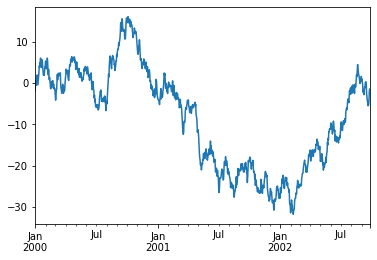

In [76]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

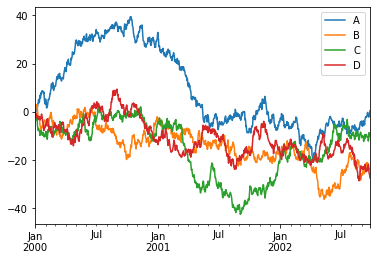

In [77]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

df.plot()
plt.legend(loc='best')

# 13. Importing / Exporting Data

### CSV

In [78]:
# Writing to a csv file
df.to_csv('data.csv')

In [79]:
# Reading from a csv file
pd.read_csv('data.csv', index_col=0).head()

,A,B,C,D
2000-01-01,-0.818816,-0.187029,-0.152357,0.440497
2000-01-02,0.651399,1.306258,-0.622666,-0.072183
2000-01-03,0.289200,2.656103,-1.171223,-0.699359
2000-01-04,1.829214,2.699404,-0.717880,-0.747309
2000-01-05,3.021244,2.446515,-3.289249,-2.322926


### Excel

In [80]:
# Writing to an excel file
df.to_excel('data.xlsx', sheet_name='Sheet1')

In [81]:
# Reading from an excel file
pd.read_excel('data.xlsx', index_col=0).head()

,A,B,C,D
2000-01-01,-0.818816,-0.187029,-0.152357,0.440497
2000-01-02,0.651399,1.306258,-0.622666,-0.072183
2000-01-03,0.289200,2.656103,-1.171223,-0.699359
2000-01-04,1.829214,2.699404,-0.717880,-0.747309
2000-01-05,3.021244,2.446515,-3.289249,-2.322926


### HDF5

In [82]:
# Writing to a HDF5 Store
df.to_hdf('data.hdf', 'df')

In [83]:
# Reading from a HDF5 Store 
pd.read_hdf('data.hdf', 'df').head()

,A,B,C,D
2000-01-01,-0.818816,-0.187029,-0.152357,0.440497
2000-01-02,0.651399,1.306258,-0.622666,-0.072183
2000-01-03,0.289200,2.656103,-1.171223,-0.699359
2000-01-04,1.829214,2.699404,-0.717880,-0.747309
2000-01-05,3.021244,2.446515,-3.289249,-2.322926
